In [ ]:
import pandas as pd
import plotly.express as px

In [3]:
df = pd.read_csv("plsdb_filtered.tsv", sep='\t')

In [4]:
df

,ACC_NUCCORE,Topology_NUCCORE,CreateDate_NUCCORE,Location_BIOSAMPLE,loc_parsed,loc_lat,loc_lng,IsolationSource_BIOSAMPLE,Host_BIOSAMPLE,SamplType_BIOSAMPLE,...,taxon_species_name,taxon_genus_name,taxon_family_name,taxon_order_name,taxon_class_name,taxon_phylum_name,taxon_superkingdom_name,D1,D2,recid
0,CP080583.1,circular,2021-08-12,China: Beijing,"China,Beijing",39.905963,116.391248,gut,Locusta migratoria,whole organism,...,Weissella confusa (1583),Weissella (46255),Lactobacillaceae (33958),Lactobacillales (186826),Bacilli (91061),Firmicutes (1239),Bacteria (2),13.807641,6.013287,1
1,CP080570.1,circular,2021-08-12,Poland: Lublin,"Poland,Lublin",51.250559,22.570102,environmental,NaN,Monoisolate,...,Apilactobacillus kunkeei (148814),Apilactobacillus (2767877),Lactobacillaceae (33958),Lactobacillales (186826),Bacilli (91061),Firmicutes (1239),Bacteria (2),-1.091991,16.383528,2
2,MW415444.1,circular,2021-08-11,South Korea: Seoul,NaN,37.460000,126.950000,urine,Canis lupus mixed,NaN,...,Klebsiella pneumoniae (573),Klebsiella (570),Enterobacteriaceae (543),Enterobacterales (91347),Gammaproteobacteria (1236),Proteobacteria (1224),Bacteria (2),21.823706,14.156123,3
3,MW415443.1,circular,2021-08-11,South Korea: Seoul,NaN,37.460000,126.950000,urine,Canis lupus pekingnese,NaN,...,Klebsiella pneumoniae (573),Klebsiella (570),Enterobacteriaceae (543),Enterobacterales (91347),Gammaproteobacteria (1236),Proteobacteria (1224),Bacteria (2),21.828913,14.155354,4
4,MW415442.1,circular,2021-08-11,South Korea: Seoul,NaN,37.460000,126.950000,ear swab,Canis lupus bichon frise,NaN,...,Escherichia coli (562),Escherichia (561),Enterobacteriaceae (543),Enterobacterales (91347),Gammaproteobacteria (1236),Proteobacteria (1224),Bacteria (2),22.279633,14.122363,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34508,NC_021737.1,circular,2013-07-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Clostridium chauvoei (46867),Clostridium (1485),Clostridiaceae (31979),Eubacteriales (186802),Clostridia (186801),Firmicutes (1239),Bacteria (2),0.835240,15.432205,34509
34509,NC_010097.1,linear,1993-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Streptomyces lavendulae (1914),Streptomyces (1883),Streptomycetaceae (2062),Streptomycetales (85011),Actinomycetia (1760),Actinobacteria (201174),Bacteria (2),-1.892958,16.137589,34510
34510,NC_008442.1,linear,2006-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Borrelia duttonii (40834),Borrelia (138),Borreliaceae (1643685),Spirochaetales (136),Spirochaetia (203692),Spirochaetes (203691),Bacteria (2),3.099851,15.841909,34511
34511,NC_002100.1,circular,1997-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Candidatus Phytoplasma sp. (2155),Candidatus Phytoplasma (33926),Acholeplasmataceae (2146),Acholeplasmatales (186329),Mollicutes (31969),Tenericutes (544448),Bacteria (2),0.747755,15.518630,34512


In [5]:
taxonomy_counts = df.groupby("taxon_genus_name")['taxon_genus_name'].count()

In [6]:
taxonomy_counts = taxonomy_counts.reset_index(name='count')

In [8]:
taxonomy_counts['organism'] = taxonomy_counts["taxon_genus_name"]
taxonomy_counts.loc[taxonomy_counts['count'] < taxonomy_counts['count'].max() * 0.05, 'organism'] = 'other'

In [ ]:
fig = px.pie(taxonomy_counts, values='count', names='genus', title='Number of plasmids in PLSDB per genus',  width=1600, height=800)
fig.update_layout(legend=dict(yanchor="top", y=1, xanchor="left", x=0.75), title_x=0.6)

In [ ]:
## Generate file with mapping from tax_id to genus

In [20]:
%%bash
cat assembly_summary.txt| csvtk cut -Ht -f 7 -l | uniq | taxonkit lineage | taxonkit reformat -F -f "{g}" | csvtk cut -Ht -f 1,3 > genera.txt

14:37:58.377 [WARN] taxid 2976818 was deleted


In [ ]:
## Load the file with genera as python dict

In [26]:
genera = pd.read_csv("genera.txt", sep='\t', names=["taxid", "genus"], index_col=False)

In [28]:
genera_dict = dict(zip(genera['taxid'], genera['genus']))

In [33]:
## Generate genus level chart

In [31]:
df['genus'] = df['taxid'].map(genera_dict)

In [34]:
genus_counts = df.groupby("genus")['genus'].count()

In [35]:
genus_counts = genus_counts.reset_index(name='count')

In [37]:
genus_counts['genus_name'] = genus_counts["genus"]
genus_counts.loc[genus_counts['count'] < genus_counts['count'].max() * 0.05, 'genus_name'] = 'other'

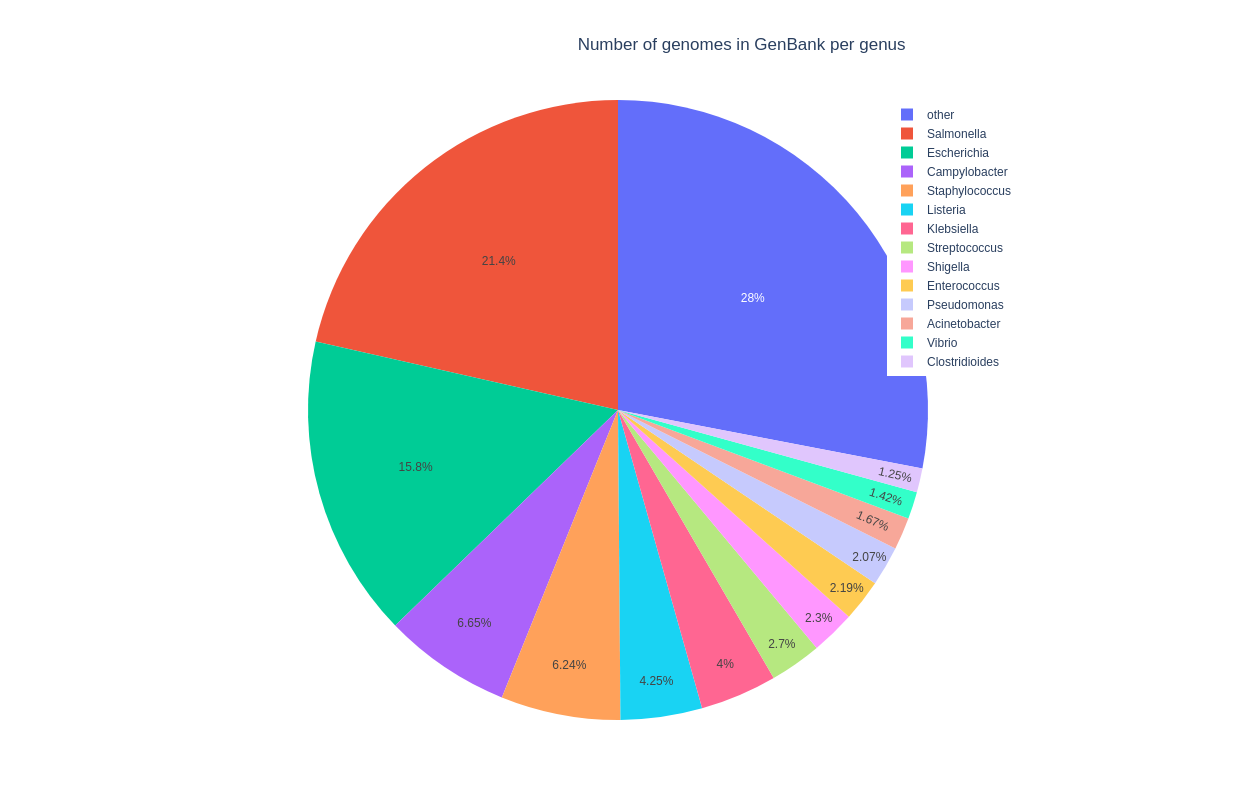

In [39]:
fig = px.pie(genus_counts, values='count', names='genus_name', title='Number of genomes in GenBank per genus',  width=1600, height=800)
fig.update_layout(legend=dict(yanchor="top", y=1, xanchor="left", x=0.75), title_x=0.6)